In [666]:
## Import Libraries
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from io import StringIO

In [667]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8]
pd.plotting.register_matplotlib_converters()
plt.style.use('seaborn-dark')

In [668]:
download_link = 'https://www.arcgis.com/sharing/rest/content/items/f10774f1c63e40168479a1feb6c7ca74/data'
# see https://www.arcgis.com/home/item.html?id=dd4580c810204019a7b8eb3e0b329dd6
# new source https://www.arcgis.com/home/item.html?id=f10774f1c63e40168479a1feb6c7ca74

In [669]:
req = requests.get(download_link)
rki_raw = pd.read_csv(StringIO(req.text))

In [670]:
rki_raw.tail()

FID  IdBundesland Bundesland            Landkreis Altersgruppe  \
1454920  1454921            16  Thüringen  LK Altenburger Land      A35-A59   
1454921  1454922            16  Thüringen  LK Altenburger Land      A35-A59   
1454922  1454923            16  Thüringen  LK Altenburger Land      A35-A59   
1454923  1454924            16  Thüringen  LK Altenburger Land      A35-A59   
1454924  1454925            16  Thüringen  LK Altenburger Land      A35-A59   

        Geschlecht  AnzahlFall  AnzahlTodesfall           Meldedatum  \
1454920          M           1                0  2020/11/15 00:00:00   
1454921          M           1                0  2020/11/15 00:00:00   
1454922          M           1                0  2020/11/15 00:00:00   
1454923          M           1                0  2020/11/15 00:00:00   
1454924          M           1                0  2020/11/16 00:00:00   

         IdLandkreis             Datenstand  NeuerFall  NeuerTodesfall  \
1454920        16077  22.03.2021, 00:00 Uhr          0              -9   
1454921        16077  22.03.2021, 00:00 Uhr          0              -9   
1454922        16077  22.03.2021, 00:00 Uhr          0              -9   
1454923        16077  22.03.2021, 00:00 Uhr          0              -9   
1454924        16077  22.03.2021, 00:00 Uhr          0              -9   

                    Refdatum  NeuGenesen  AnzahlGenesen  IstErkrankungsbeginn  \
1454920  2020/11/05 00:00:00           0              1                     1   
1454921  2020/11/09 00:00:00           0              1                     1   
1454922  2020/11/11 00:00:00           0              1                     1   
1454923  2020/11/15 00:00:00           0              1                     0   
1454924  2020/11/13 00:00:00           0              1                     1   

             Altersgruppe2  
1454920  Nicht übermittelt  
1454921  Nicht übermittelt  
1454922  Nicht übermittelt  
1454923  Nicht übermittelt  
1454924  Nicht übermittelt

In [671]:
set(rki_raw['Altersgruppe'])

{'A00-A04', 'A05-A14', 'A15-A34', 'A35-A59', 'A60-A79', 'A80+', 'unbekannt'}

In [672]:
rki_raw

FID  IdBundesland          Bundesland            Landkreis  \
0              1             1  Schleswig-Holstein         SK Flensburg   
1              2             1  Schleswig-Holstein         SK Flensburg   
2              3             1  Schleswig-Holstein         SK Flensburg   
3              4             1  Schleswig-Holstein         SK Flensburg   
4              5             1  Schleswig-Holstein         SK Flensburg   
...          ...           ...                 ...                  ...   
1454920  1454921            16           Thüringen  LK Altenburger Land   
1454921  1454922            16           Thüringen  LK Altenburger Land   
1454922  1454923            16           Thüringen  LK Altenburger Land   
1454923  1454924            16           Thüringen  LK Altenburger Land   
1454924  1454925            16           Thüringen  LK Altenburger Land   

        Altersgruppe Geschlecht  AnzahlFall  AnzahlTodesfall  \
0            A00-A04          M           1                0   
1            A00-A04          M           1                0   
2            A00-A04          M           1                0   
3            A00-A04          M           1                0   
4            A00-A04          M           1                0   
...              ...        ...         ...              ...   
1454920      A35-A59          M           1                0   
1454921      A35-A59          M           1                0   
1454922      A35-A59          M           1                0   
1454923      A35-A59          M           1                0   
1454924      A35-A59          M           1                0   

                  Meldedatum  IdLandkreis             Datenstand  NeuerFall  \
0        2020/09/30 00:00:00         1001  22.03.2021, 00:00 Uhr          0   
1        2020/10/29 00:00:00         1001  22.03.2021, 00:00 Uhr          0   
2        2020/11/03 00:00:00         1001  22.03.2021, 00:00 Uhr          0   
3        2020/11/20 00:00:00         1001  22.03.2021, 00:00 Uhr          0   
4        2020/11/23 00:00:00         1001  22.03.2021, 00:00 Uhr          0   
...                      ...          ...                    ...        ...   
1454920  2020/11/15 00:00:00        16077  22.03.2021, 00:00 Uhr          0   
1454921  2020/11/15 00:00:00        16077  22.03.2021, 00:00 Uhr          0   
1454922  2020/11/15 00:00:00        16077  22.03.2021, 00:00 Uhr          0   
1454923  2020/11/15 00:00:00        16077  22.03.2021, 00:00 Uhr          0   
1454924  2020/11/16 00:00:00        16077  22.03.2021, 00:00 Uhr          0   

         NeuerTodesfall             Refdatum  NeuGenesen  AnzahlGenesen  \
0                    -9  2020/09/30 00:00:00           0              1   
1                    -9  2020/10/29 00:00:00           0              1   
2                    -9  2020/11/03 00:00:00           0              1   
3                    -9  2020/11/19 00:00:00           0              1   
4                    -9  2020/11/18 00:00:00           0              1   
...                 ...                  ...         ...            ...   
1454920              -9  2020/11/05 00:00:00           0              1   
1454921              -9  2020/11/09 00:00:00           0              1   
1454922              -9  2020/11/11 00:00:00           0              1   
1454923              -9  2020/11/15 00:00:00           0              1   
1454924              -9  2020/11/13 00:00:00           0              1   

         IstErkrankungsbeginn      Altersgruppe2  
0                           0  Nicht übermittelt  
1                           0  Nicht übermittelt  
2                           0  Nicht übermittelt  
3                           1  Nicht übermittelt  
4                           1  Nicht übermittelt  
...                       ...                ...  
1454920                     1  Nicht übermittelt  
1454921                     1  Nicht übermittelt  
1454922                     1  Nic

In [673]:
rki_raw_60 = rki_raw[~rki_raw.Altersgruppe.isin(['A60-A79', 'A80+'])].copy()

In [674]:
rki_raw_under60 = rki_raw[~rki_raw.Altersgruppe.isin(['A60-A79', 'A80+'])].copy()

In [675]:
rki_raw_80 = rki_raw[rki_raw.Altersgruppe.isin(['A80+'])].copy()

In [676]:
rki_raw_80_death = rki_raw_80[rki_raw_80.NeuerTodesfall.isin([0, 1])].copy()

In [677]:
rki_raw_80_death.sort_values(by='Meldedatum').tail()

FID  IdBundesland              Bundesland  \
1316053  1316054            14                 Sachsen   
553054    553055             6                  Hessen   
1175538  1175539            11                  Berlin   
803416    803417             8       Baden-Württemberg   
1273169  1273170            13  Mecklenburg-Vorpommern   

                              Landkreis Altersgruppe Geschlecht  AnzahlFall  \
1316053                      SK Dresden         A80+          M           1   
553054              LK Limburg-Weilburg         A80+          W           1   
1175538  SK Berlin Tempelhof-Schöneberg         A80+          M           1   
803416                      LK Konstanz         A80+          M           1   
1273169        LK Vorpommern-Greifswald         A80+          W           2   

         AnzahlTodesfall           Meldedatum  IdLandkreis  \
1316053                1  2021/03/18 00:00:00        14612   
553054                 1  2021/03/19 00:00:00         6533   
1175538                1  2021/03/19 00:00:00        11007   
803416                 1  2021/03/19 00:00:00         8335   
1273169                2  2021/03/20 00:00:00        13075   

                    Datenstand  NeuerFall  NeuerTodesfall  \
1316053  22.03.2021, 00:00 Uhr          0               0   
553054   22.03.2021, 00:00 Uhr          0               0   
1175538  22.03.2021, 00:00 Uhr          0               0   
803416   22.03.2021, 00:00 Uhr          0               1   
1273169  22.03.2021, 00:00 Uhr          0               0   

                    Refdatum  NeuGenesen  AnzahlGenesen  IstErkrankungsbeginn  \
1316053  2021/03/18 00:00:00          -9              0                     0   
553054   2021/03/19 00:00:00          -9              0                     0   
1175538  2021/03/19 00:00:00          -9              0                     0   
803416   2021/03/17 00:00:00          -9              0                     1   
1273169  2021/03/20 00:00:00          -9              0                     0   

             Altersgruppe2  
1316053  Nicht übermittelt  
553054   Nicht übermittelt  
1175538  Nicht übermittelt  
803416   Nicht übermittelt  
1273169  Nicht übermittelt

In [678]:
def new_cases_by_date(rki_raw, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall'):
    """
    rki_raw: raw DataFrame from Robert Koch Institute
    """
    condition = rki_raw[rki_flag_column].isin((0, 1))
    rki_series = rki_raw[condition].groupby('Meldedatum').sum()[rki_count_columns].copy()
    rki_series.index = pd.to_datetime(rki_series.index)
    rki_series.sort_index(inplace=True)
    return rki_series

In [679]:
def process_raw_df(raw_df):
    rki_cases = new_cases_by_date(raw_df, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall')
    rki_death = new_cases_by_date(raw_df, rki_flag_column='NeuerTodesfall', rki_count_columns='AnzahlTodesfall')
    rki_recovered = new_cases_by_date(raw_df, rki_flag_column='NeuGenesen', rki_count_columns='AnzahlGenesen')
    rki_df = pd.concat([rki_cases, rki_death, rki_recovered], axis=1, sort=True)
    columns_dict = {'AnzahlFall': 'NewCases', 'AnzahlTodesfall': 'NewDeathRKI', 'AnzahlGenesen': 'NewRecoveredRKI'}
    rki_df.rename(columns_dict, axis=1, inplace=True)
    rki_df['Case Fatality'] = rki_df.NewDeathRKI / rki_df.NewCases * 100
    rki_df.replace(np.nan, 0, inplace=True)
    return rki_df

In [680]:
age_groups = set(rki_raw['Altersgruppe'])
age_groups

{'A00-A04', 'A05-A14', 'A15-A34', 'A35-A59', 'A60-A79', 'A80+', 'unbekannt'}

In [681]:
def stratify_by_age(raw_df, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall'):
    age_groups = set(raw_df['Altersgruppe'])
    age_groups_list = []
    for age_group in age_groups:
        rki_raw_age = raw_df[raw_df.Altersgruppe.isin([age_group])].copy()
        rki_cases = new_cases_by_date(rki_raw_age, rki_flag_column=rki_flag_column, rki_count_columns=rki_count_columns)
        rki_cases.name = age_group
        age_groups_list.append(rki_cases)
    age_groups_df = pd.concat(age_groups_list, axis=1, sort=True)
    age_groups_df.replace(np.nan, 0, inplace=True)
    return age_groups_df



In [ ]:
def rolling_average(rki_df):
    rki_df = rki_df.rolling(7).sum() / 7
    


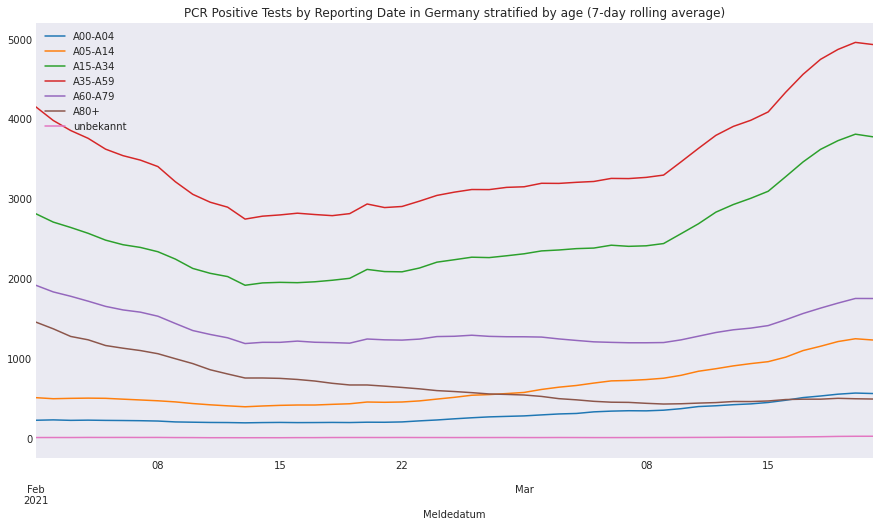

In [745]:
(age_groups_df.rolling(7).sum() / 7)['02-01-2021':].plot()
plt.title('PCR Positive Tests by Reporting Date in Germany stratified by age (7-day rolling average)')
plt.legend(loc='upper left')

In [682]:
rki_flag_column='NeuerFall'
rki_count_columns='AnzahlFall'
rki_raw_age2 = rki_raw[rki_raw.Altersgruppe.isin(['A00-A04'])].copy()
rki_cases2 = new_cases_by_date(rki_raw_age2)

In [685]:
age_groups_df = stratify_by_age(rki_raw)

In [686]:
age_groups_df = age_groups_df.reindex(sorted(age_groups_df.columns), axis=1)

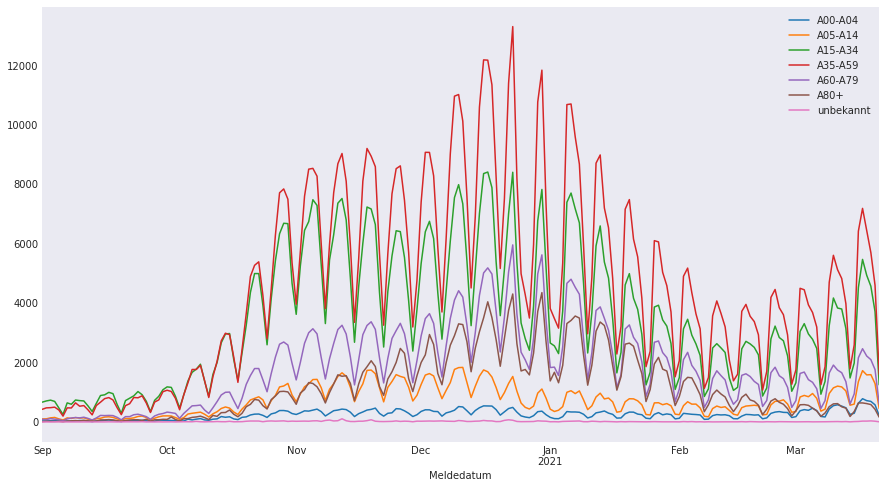

In [725]:
age_groups_df['09-01-2020':].plot()

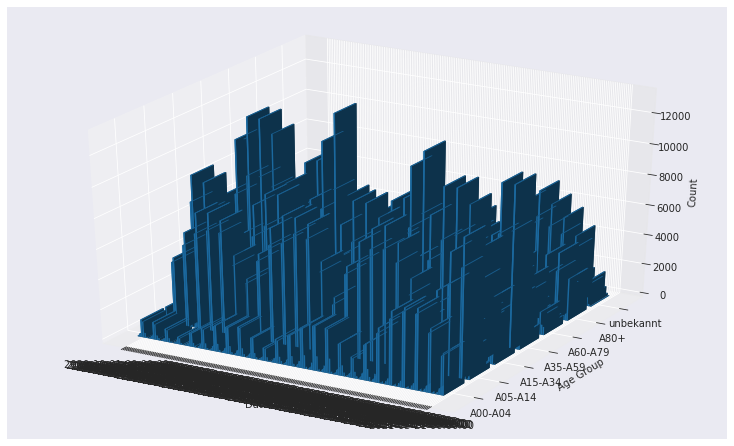

In [687]:
start_date = '10-01-2020'
age_df_slice = age_groups_df[start_date:]
# thickness of the bars
dx, dy = .8, .8

# prepare 3d axes
fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig)

# set up positions for the bars 
xpos=np.arange(age_df_slice.shape[0])
ypos=np.arange(age_df_slice.shape[1])

# set the ticks in the middle of the bars
ax.set_xticks(xpos + dx/2)
ax.set_yticks(ypos + dy/2)

# create meshgrid 
# print xpos before and after this block if not clear
xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten()
ypos = ypos.flatten()

# the bars starts from 0 attitude
zpos=np.zeros(age_df_slice.shape).flatten()

# the bars' heights
dz = age_df_slice.values.ravel()

# plot 
ax.bar3d(xpos,ypos,zpos,dx,dy,dz)

# put the column / index labels
ax.w_yaxis.set_ticklabels(age_df_slice.columns)
ax.w_xaxis.set_ticklabels(age_df_slice.index)

# name the axes
ax.set_xlabel('Date')
ax.set_ylabel('Age Group')
ax.set_zlabel('Count')

plt.show()

In [688]:
rki_raw_fb = rki_raw[rki_raw.Landkreis.isin(['SK Flensburg'])].copy()
rki_raw_fb.tail()

FID  IdBundesland          Bundesland     Landkreis Altersgruppe  \
2495  2496             1  Schleswig-Holstein  SK Flensburg      A35-A59   
2496  2497             1  Schleswig-Holstein  SK Flensburg      A35-A59   
2497  2498             1  Schleswig-Holstein  SK Flensburg      A35-A59   
2498  2499             1  Schleswig-Holstein  SK Flensburg      A35-A59   
2499  2500             1  Schleswig-Holstein  SK Flensburg      A35-A59   

     Geschlecht  AnzahlFall  AnzahlTodesfall           Meldedatum  \
2495          W           1                0  2020/10/22 00:00:00   
2496          W           1                0  2020/10/23 00:00:00   
2497          W           1                0  2020/10/23 00:00:00   
2498          W           1                0  2020/10/25 00:00:00   
2499          W           1                0  2020/10/25 00:00:00   

      IdLandkreis             Datenstand  NeuerFall  NeuerTodesfall  \
2495         1001  22.03.2021, 00:00 Uhr          0              -9   
2496         1001  22.03.2021, 00:00 Uhr          0              -9   
2497         1001  22.03.2021, 00:00 Uhr          0              -9   
2498         1001  22.03.2021, 00:00 Uhr          0              -9   
2499         1001  22.03.2021, 00:00 Uhr          0              -9   

                 Refdatum  NeuGenesen  AnzahlGenesen  IstErkrankungsbeginn  \
2495  2020/10/22 00:00:00           0              1                     0   
2496  2020/10/20 00:00:00           0              1                     1   
2497  2020/10/23 00:00:00           0              1                     0   
2498  2020/10/01 00:00:00           0              1                     1   
2499  2020/10/19 00:00:00           0              1                     1   

          Altersgruppe2  
2495  Nicht übermittelt  
2496  Nicht übermittelt  
2497  Nicht übermittelt  
2498  Nicht übermittelt  
2499  Nicht übermittelt

In [689]:
rki_raw_kln = rki_raw[rki_raw.Landkreis.isin(['SK Köln'])].copy()
rki_raw_kln.tail()

FID  IdBundesland           Bundesland Landkreis Altersgruppe  \
277018  277019             5  Nordrhein-Westfalen   SK Köln         A80+   
277019  277020             5  Nordrhein-Westfalen   SK Köln         A80+   
277020  277021             5  Nordrhein-Westfalen   SK Köln         A80+   
277021  277022             5  Nordrhein-Westfalen   SK Köln         A80+   
277022  277023             5  Nordrhein-Westfalen   SK Köln         A80+   

       Geschlecht  AnzahlFall  AnzahlTodesfall           Meldedatum  \
277018          W           1                0  2020/09/18 00:00:00   
277019          W           1                0  2020/09/22 00:00:00   
277020          W           1                0  2020/09/23 00:00:00   
277021          W           1                0  2020/09/24 00:00:00   
277022          W           1                0  2020/09/25 00:00:00   

        IdLandkreis             Datenstand  NeuerFall  NeuerTodesfall  \
277018         5315  22.03.2021, 00:00 Uhr          0              -9   
277019         5315  22.03.2021, 00:00 Uhr          0              -9   
277020         5315  22.03.2021, 00:00 Uhr          0              -9   
277021         5315  22.03.2021, 00:00 Uhr          0              -9   
277022         5315  22.03.2021, 00:00 Uhr          0              -9   

                   Refdatum  NeuGenesen  AnzahlGenesen  IstErkrankungsbeginn  \
277018  2020/09/13 00:00:00           0              1                     1   
277019  2020/09/22 00:00:00           0              1                     0   
277020  2020/09/23 00:00:00           0              1                     0   
277021  2020/09/21 00:00:00           0              1                     1   
277022  2020/09/21 00:00:00           0              1                     1   

            Altersgruppe2  
277018  Nicht übermittelt  
277019  Nicht übermittelt  
277020  Nicht übermittelt  
277021  Nicht übermittelt  
277022  Nicht übermittelt

In [690]:
rki_fb_cases = new_cases_by_date(rki_raw_fb, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall')
rki_kln_cases = new_cases_by_date(rki_raw_kln, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall')


In [691]:
rki_kln_incidence = rki_kln_cases.rolling(7).sum() / 1017000 * 100000

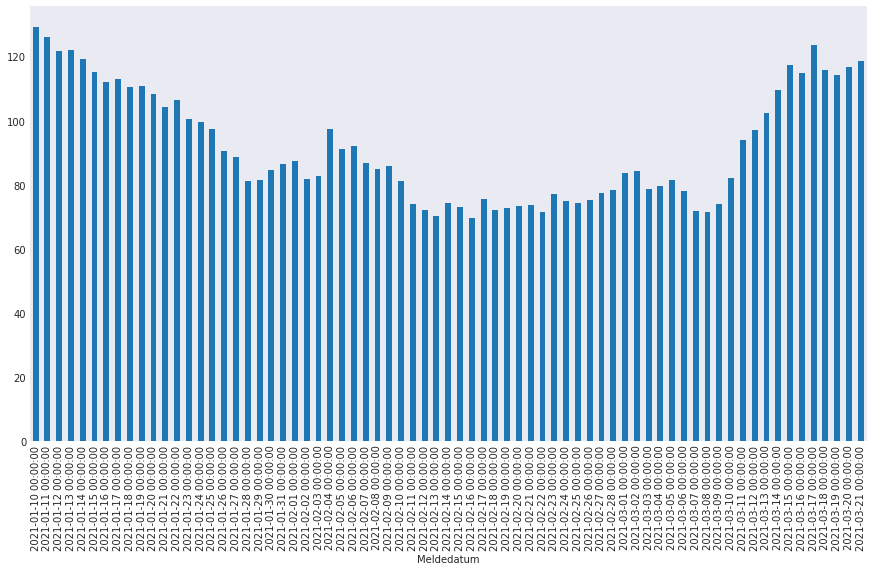

In [692]:
rki_kln_incidence['01-10-2021':].plot.bar()

In [693]:
rki_kln_incidence.tail()

Meldedatum
2021-03-17    123.500492
2021-03-18    115.929204
2021-03-19    114.257620
2021-03-20    116.814159
2021-03-21    118.584071
Name: AnzahlFall, dtype: float64

In [694]:
rki_kln = process_raw_df(rki_raw_kln)

In [695]:
rki_under60 = process_raw_df(rki_raw_60)
rki_under60.tail()

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality
Meldedatum                                                       
2021-03-17     15182          1.0              282       0.006587
2021-03-18     13690          4.0              145       0.029218
2021-03-19     12572          3.0               57       0.023863
2021-03-20     10194          0.0               31       0.000000
2021-03-21      3518          0.0                7       0.000000

In [696]:
rki_raw_under14 = rki_raw[rki_raw.Altersgruppe.isin(['A00-A04', 'A05-A14'])].copy()
rki_under14 = process_raw_df(rki_raw_under14)
rki_under14.tail()

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality
Meldedatum                                                       
2021-03-17      2506          0.0               52       0.000000
2021-03-18      2298          1.0               22       0.043516
2021-03-19      2281          0.0                8       0.000000
2021-03-20      1865          0.0                7       0.000000
2021-03-21       664          0.0                2       0.000000

In [697]:
rki_under14.NewDeathRKI.sum()

10.0

In [698]:
set(rki_raw['Altersgruppe'])

{'A00-A04', 'A05-A14', 'A15-A34', 'A35-A59', 'A60-A79', 'A80+', 'unbekannt'}

In [699]:
rki_raw_under80 = rki_raw[~rki_raw.Altersgruppe.isin(['A80+'])].copy()
rki_under80 = process_raw_df(rki_raw_under80)
rki_under80.tail()

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality
Meldedatum                                                       
2021-03-17     17644          5.0              345       0.028338
2021-03-18     15907          7.0              173       0.044006
2021-03-19     14667          5.0               78       0.034090
2021-03-20     11955          1.0               46       0.008365
2021-03-21      4114          1.0               13       0.024307

In [700]:
rki_raw_60to80 = rki_raw[rki_raw.Altersgruppe.isin(['A60-A79'])].copy()
rki_60to80 = process_raw_df(rki_raw_60to80)
rki_60to80.tail()

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality
Meldedatum                                                       
2021-03-17      2462          4.0               63       0.162470
2021-03-18      2217          3.0               28       0.135318
2021-03-19      2095          2.0               21       0.095465
2021-03-20      1761          1.0               15       0.056786
2021-03-21       596          1.0                6       0.167785

In [701]:
rki = process_raw_df(rki_raw)
# using estimates for recovery dates and death dates
shift_recovery = 14 # days
shift_death = 20 # days
rki['NewRecovered'] = rki.NewRecoveredRKI.shift(shift_recovery).fillna(0)
rki['NewDeath'] = rki.NewDeathRKI.shift(shift_death).fillna(0)
s = rki['NewRecoveredRKI'].copy()
s.values[:-shift_recovery] = 0.
rki['NewRecovered'] += s
s = rki['NewDeathRKI'].copy()
s.values[:-shift_death] = 0.
rki['NewDeath'] += s
rki.fillna(value=0., inplace=True)
rki.tail()

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality  \
Meldedatum                                                          
2021-03-17     18283         23.0              353       0.125800   
2021-03-18     16524         13.0              176       0.078673   
2021-03-19     15251          8.0               82       0.052456   
2021-03-20     12380          3.0               47       0.024233   
2021-03-21      4273          1.0               15       0.023403   

            NewRecovered  NewDeath  
Meldedatum                          
2021-03-17        8344.0     174.0  
2021-03-18        7415.0     148.0  
2021-03-19        6867.0      89.0  
2021-03-20        5865.0      49.0  
2021-03-21        2241.0     101.0

In [702]:
rki80 = process_raw_df(rki_raw_80) # only age 80+
rki80.tail()

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality
Meldedatum                                                       
2021-03-17       639         18.0                8       2.816901
2021-03-18       617          6.0                3       0.972447
2021-03-19       584          3.0                4       0.513699
2021-03-20       425          2.0                1       0.470588
2021-03-21       159          0.0                2       0.000000

Text(0.5, 1.0, 'Case Fatality Germany for cases aged 80 or above (%)')

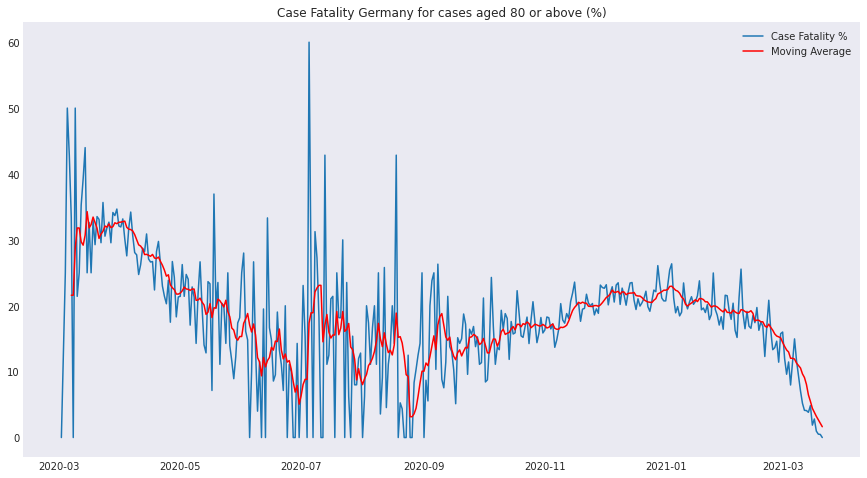

In [703]:
#rki60er['Case Fatality']['10-01-2020':].plot.bar()
start_date = '03-01-2020'
x = rki80[start_date:].index
plt.plot(x, rki80['Case Fatality'][start_date:], label='Case Fatality %')
plt.plot(x, rki80['Case Fatality'].rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Case Fatality Germany for cases aged 80 or above (%)')

Text(0.5, 1.0, 'Fatalities by date of PCR positive test for ages 80+ Germany')

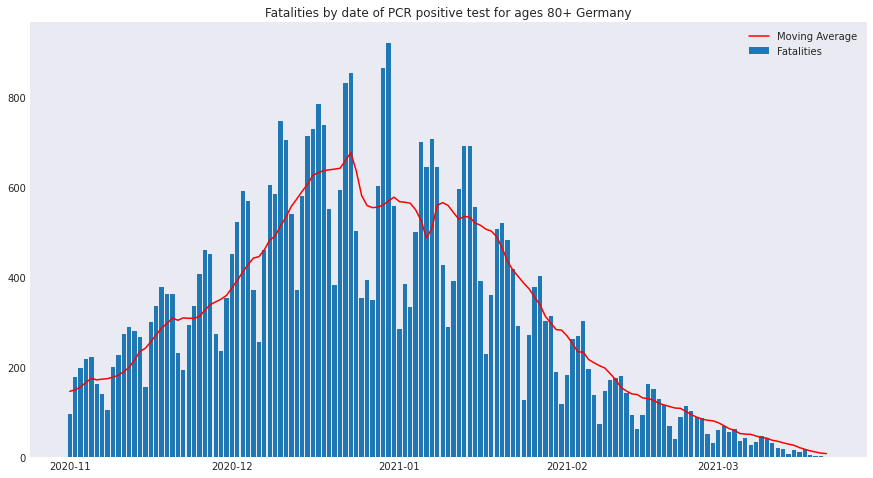

In [704]:
start_date = '11-01-2020'
x = rki80[start_date:].index
plt.bar(x, rki80.NewDeathRKI[start_date:], label='Fatalities')
plt.plot(x, rki80.NewDeathRKI.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Fatalities by date of PCR positive test for ages 80+ Germany')

In [705]:
rki['Cases'] = rki['NewCases'].cumsum()
rki['Death'] = rki['NewDeath'].cumsum()
rki['Recovered'] = rki['NewRecovered'].cumsum()
rki['ActiveCases'] = rki['Cases'] - rki['Recovered'] - rki['Death']
rki['Growth'] = rki['NewCases'] / rki['ActiveCases']
rki.tail(10)

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality  \
Meldedatum                                                          
2021-03-12     12503         34.0             1767       0.271935   
2021-03-13     10466         26.0              909       0.248423   
2021-03-14      4869         14.0              315       0.287533   
2021-03-15      6766         27.0              386       0.399054   
2021-03-16     15730         26.0              423       0.165289   
2021-03-17     18283         23.0              353       0.125800   
2021-03-18     16524         13.0              176       0.078673   
2021-03-19     15251          8.0               82       0.052456   
2021-03-20     12380          3.0               47       0.024233   
2021-03-21      4273          1.0               15       0.023403   

            NewRecovered  NewDeath    Cases    Death  Recovered  ActiveCases  \
Meldedatum                                                                     
2021-03-12        8861.0     152.0  2562683  73507.0  2371784.0     117392.0   
2021-03-13        6460.0     105.0  2573149  73612.0  2378244.0     121293.0   
2021-03-14        2879.0     160.0  2578018  73772.0  2381123.0     123123.0   
2021-03-15        3511.0     192.0  2584784  73964.0  2384634.0     126186.0   
2021-03-16        8042.0     189.0  2600514  74153.0  2392676.0     133685.0   
2021-03-17        8344.0     174.0  2618797  74327.0  2401020.0     143450.0   
2021-03-18        7415.0     148.0  2635321  74475.0  2408435.0     152411.0   
2021-03-19        6867.0      89.0  2650572  74564.0  2415302.0     160706.0   
2021-03-20        5865.0      49.0  2662952  74613.0  2421167.0     167172.0   
2021-03-21        2241.0     101.0  2667225  74714.0  2423408.0     169103.0   

              Growth  
Meldedatum            
2021-03-12  0.106506  
2021-03-13  0.086287  
2021-03-14  0.039546  
2021-03-15  0.053619  
2021-03-16  0.117665  
2021-03-17  0.127452  
2021-03-18  0.108417  
2021-03-19  0.094900  
2021-03-20  0.074055  
2021-03-21  0.025269

Text(0.5, 1.0, 'Neue Fälle RKI nach Meldedatum')

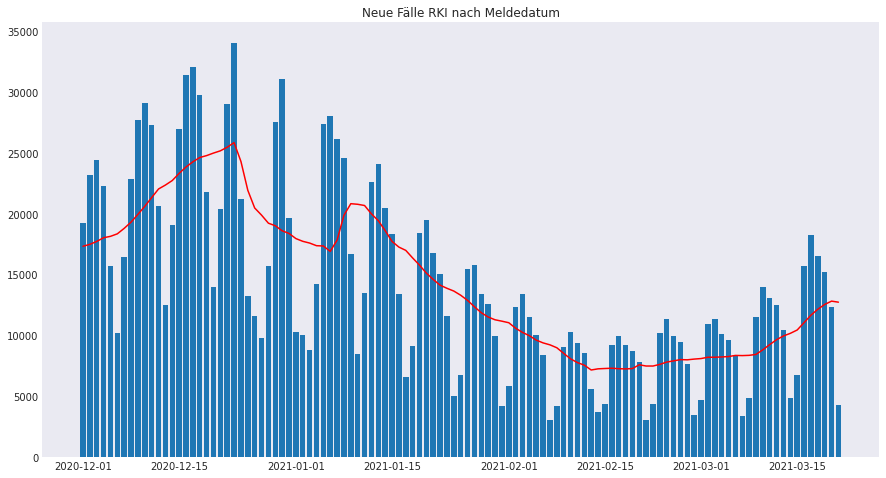

In [706]:
start_date = '12-01-2020'
x = rki[start_date:].index
plt.bar(x, rki.NewCases[start_date:], label='Growth')
plt.plot(x, rki.NewCases.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.title("Neue Fälle RKI nach Meldedatum")

<BarContainer object of 179 artists>

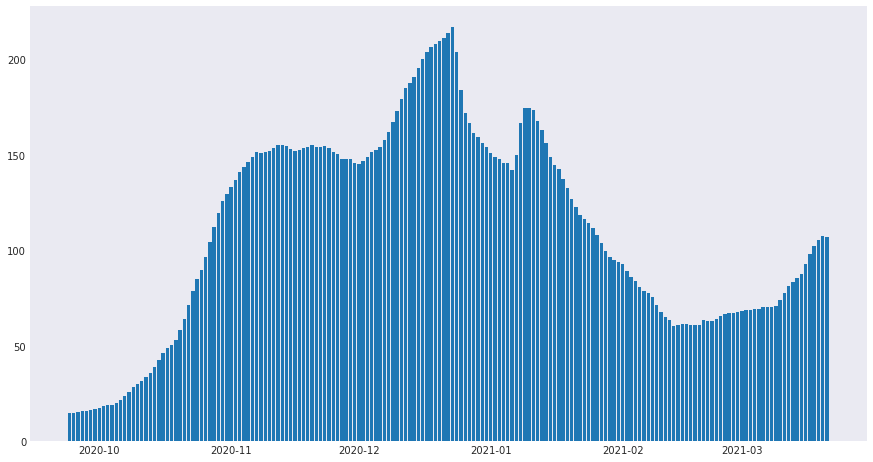

In [707]:

incidence = rki.NewCases.rolling(7).sum() /  83450000 * 100000
start_date = '09-24-2020'
x = incidence[start_date:].index
plt.bar(x, incidence[start_date:])

In [708]:
incidence.tail(10)

Meldedatum
2021-03-12     81.062912
2021-03-13     83.627322
2021-03-14     85.420012
2021-03-15     87.726783
2021-03-16     92.793289
2021-03-17     97.932894
2021-03-18    102.026363
2021-03-19    105.319353
2021-03-20    107.612942
2021-03-21    106.898742
Name: NewCases, dtype: float64

Text(0.5, 1.0, 'New Cases by date of PCR positive test for ages 80+ Germany')

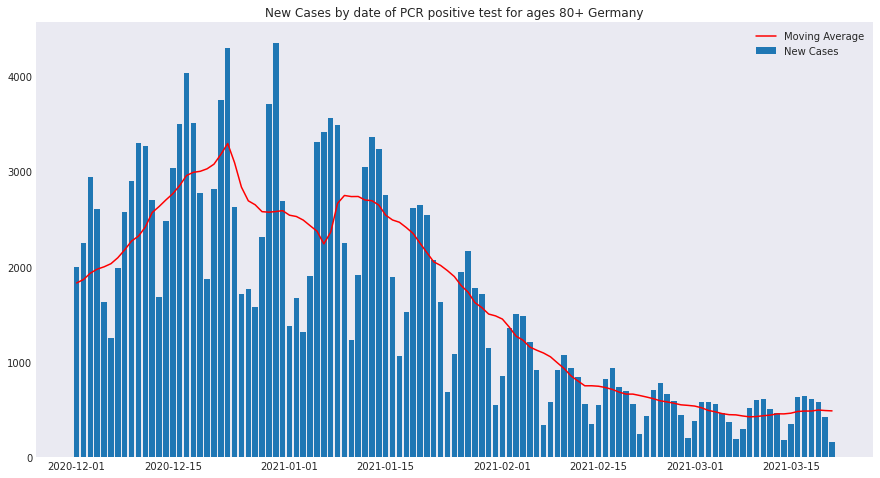

In [709]:
start_date = '12-01-2020'
x = rki80[start_date:].index
plt.bar(x, rki80.NewCases[start_date:], label='New Cases')
plt.plot(x, rki80.NewCases.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('New Cases by date of PCR positive test for ages 80+ Germany')

Text(0.5, 1.0, 'New Cases by date of PCR positive test for ages under 60 Germany')

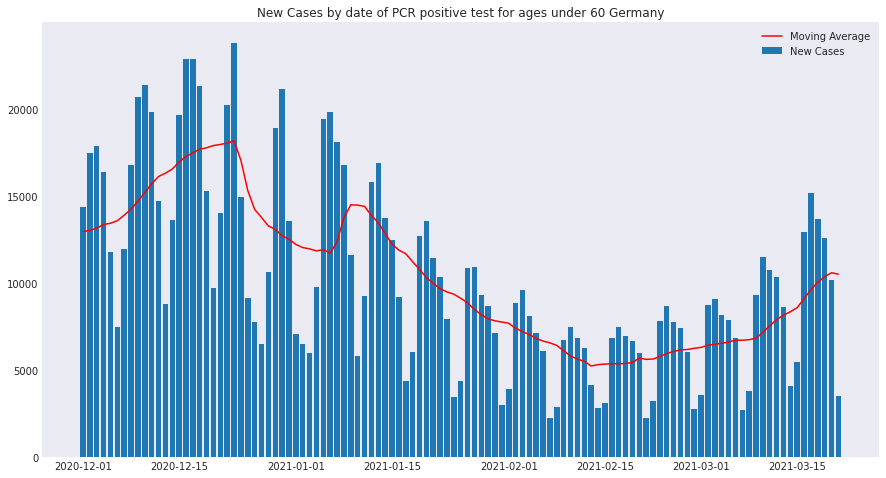

In [710]:
start_date = '12-01-2020'
x = rki_under60[start_date:].index
plt.bar(x, rki_under60.NewCases[start_date:], label='New Cases')
plt.plot(x, rki_under60.NewCases.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('New Cases by date of PCR positive test for ages under 60 Germany')

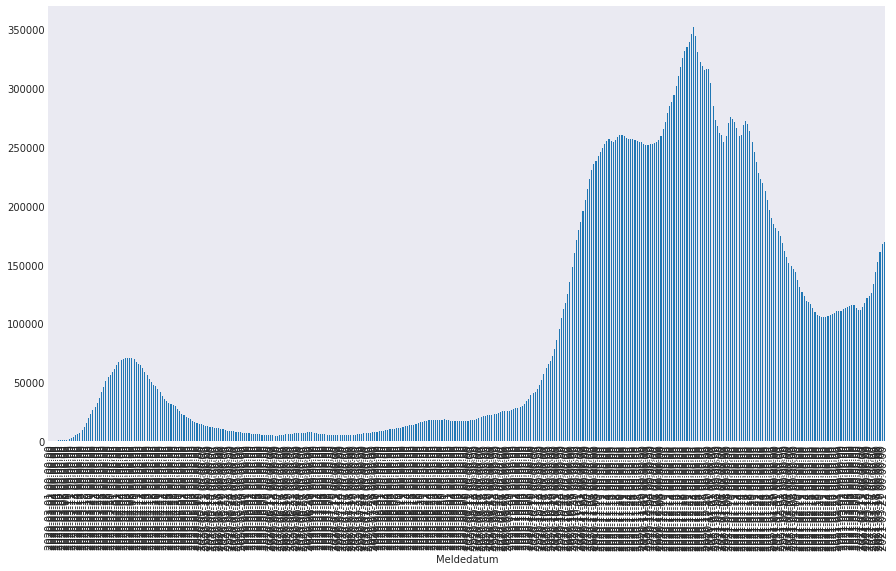

In [711]:
rki.ActiveCases['03-01-2020':].plot.bar()

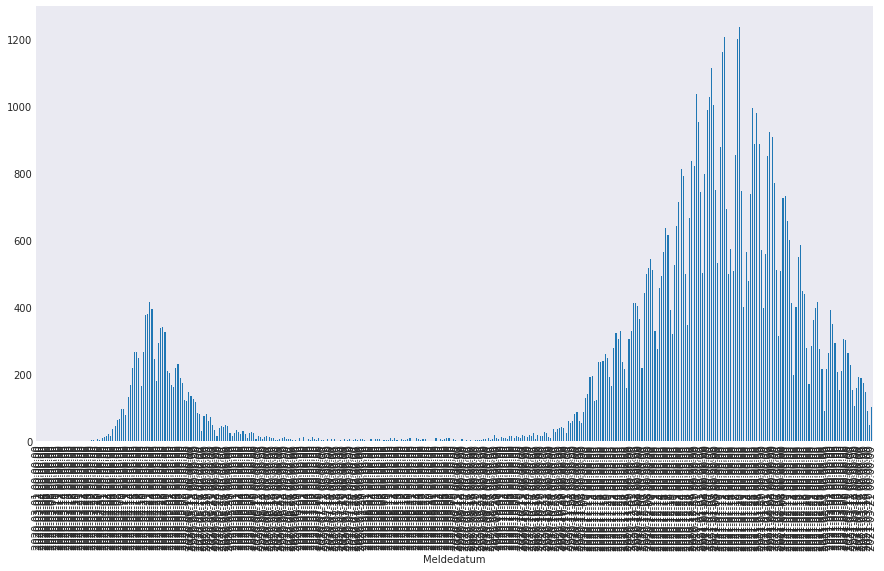

In [712]:
rki.NewDeath['03-01-2020':].plot.bar()

Text(0.5, 1.0, 'Fatalities by PCR reporting date in Germany')

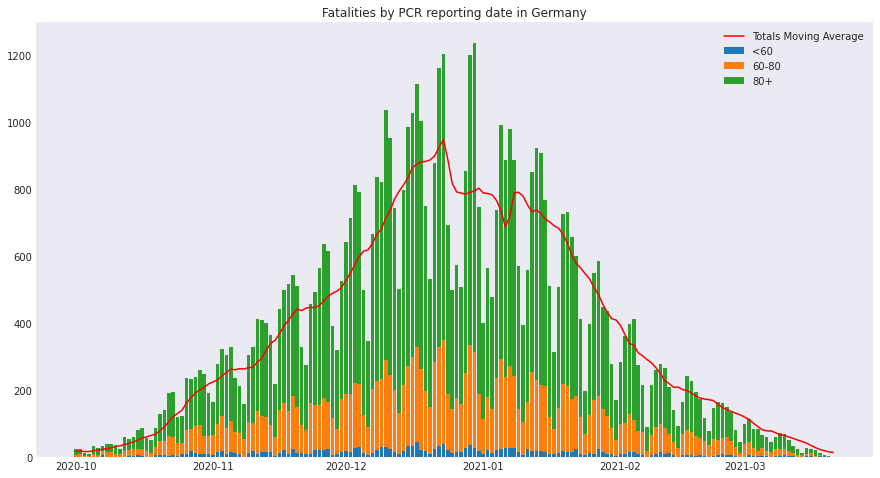

In [713]:
df = pd.DataFrame({'<60':rki_under60.NewDeathRKI, '60-80':rki_60to80.NewDeathRKI, '80+':rki80.NewDeathRKI})
df.fillna(0, inplace=True)
#df['10-01-2020':].plot.bar(label='Fatalities under 60 years', stacked=True)
start_date = '10-01-2020'
x = rki[start_date:].index
plt.bar(x, rki_under60.NewDeathRKI[start_date:], label='<60')
offset = rki_under60.NewDeathRKI[start_date:]
plt.bar(x, rki_60to80.NewDeathRKI[start_date:], label='60-80', bottom=offset)
offset = rki_under60.NewDeathRKI[start_date:] + rki_60to80.NewDeathRKI[start_date:]
plt.bar(x, rki80.NewDeathRKI[start_date:], label='80+', bottom=offset)
#plt.bar(x, rki80.NewDeathRKI[start_date:], label='New Cases')
plt.plot(x, rki.NewDeathRKI.rolling(7).sum()[start_date:] / 7, label='Totals Moving Average', color='red')
plt.legend(loc='best')
plt.title('Fatalities by PCR reporting date in Germany')

In [714]:
age_groups_df.columns

Index(['A00-A04', 'A05-A14', 'A15-A34', 'A35-A59', 'A60-A79', 'A80+',
       'unbekannt'],
      dtype='object')

Text(0.5, 1.0, 'Growth Germany')

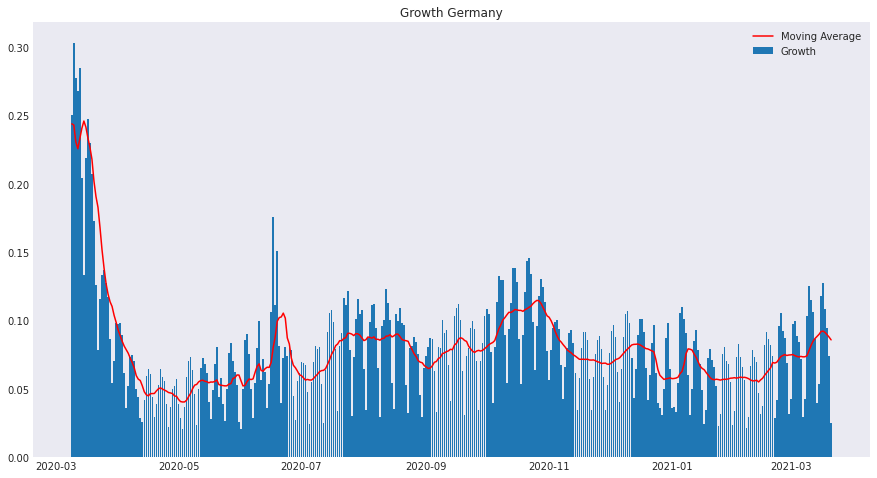

In [715]:
start_date = '03-09-2020'
x = rki[start_date:].index
plt.bar(x, rki.Growth[start_date:], label='Growth')
plt.plot(x, rki.Growth.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Growth Germany')

Text(0.5, 1.0, 'Growth Germany')

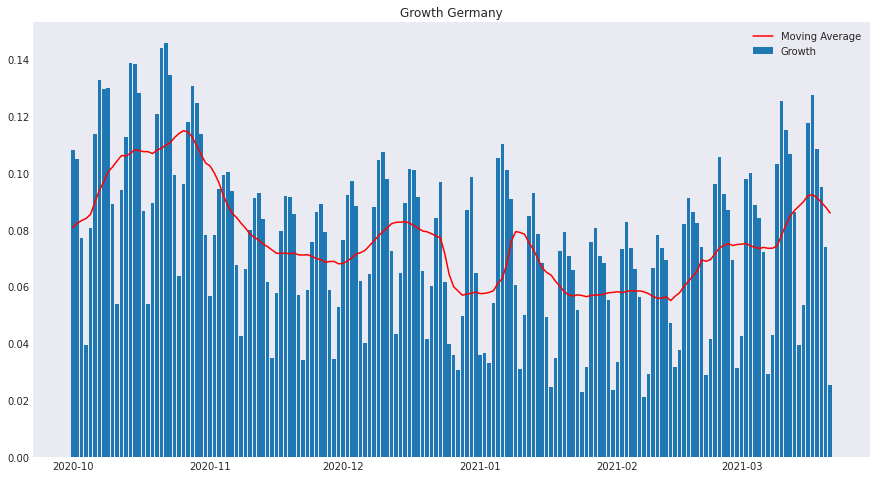

In [716]:
start_date = '10-01-2020'
x = rki[start_date:].index
plt.bar(x, rki.Growth[start_date:], label='Growth')
plt.plot(x, rki.Growth.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Growth Germany')

In [717]:
rki.tail(20)

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality  \
Meldedatum                                                          
2021-03-02     10967        115.0             7619       1.048600   
2021-03-03     11323         83.0             7991       0.733021   
2021-03-04     10122         83.0             7239       0.819996   
2021-03-05      9676         66.0             6785       0.682100   
2021-03-06      8326         60.0             5818       0.720634   
2021-03-07      3373         45.0             2226       1.334124   
2021-03-08      4841         61.0             2995       1.260070   
2021-03-09     11502         73.0             4627       0.634672   
2021-03-10     13994         69.0             4766       0.493068   
2021-03-11     13108         52.0             3057       0.396704   
2021-03-12     12503         34.0             1767       0.271935   
2021-03-13     10466         26.0              909       0.248423   
2021-03-14      4869         14.0              315       0.287533   
2021-03-15      6766         27.0              386       0.399054   
2021-03-16     15730         26.0              423       0.165289   
2021-03-17     18283         23.0              353       0.125800   
2021-03-18     16524         13.0              176       0.078673   
2021-03-19     15251          8.0               82       0.052456   
2021-03-20     12380          3.0               47       0.024233   
2021-03-21      4273          1.0               15       0.023403   

            NewRecovered  NewDeath    Cases    Death  Recovered  ActiveCases  \
Meldedatum                                                                     
2021-03-02        9009.0     392.0  2463915  71047.0  2280774.0     112094.0   
2021-03-03        9764.0     349.0  2475238  71396.0  2290538.0     113304.0   
2021-03-04        9047.0     294.0  2485360  71690.0  2299585.0     114085.0   
2021-03-05        8545.0     206.0  2495036  71896.0  2308130.0     115010.0   
2021-03-06        7659.0     153.0  2503362  72049.0  2315789.0     115524.0   
2021-03-07        2965.0     210.0  2506735  72259.0  2318754.0     115722.0   
2021-03-08        7220.0     305.0  2511576  72564.0  2325974.0     113038.0   
2021-03-09       12645.0     301.0  2523078  72865.0  2338619.0     111594.0   
2021-03-10       13656.0     264.0  2537072  73129.0  2352275.0     111668.0   
2021-03-11       10648.0     226.0  2550180  73355.0  2362923.0     113902.0   
2021-03-12        8861.0     152.0  2562683  73507.0  2371784.0     117392.0   
2021-03-13        6460.0     105.0  2573149  73612.0  2378244.0     121293.0   
2021-03-14        2879.0     160.0  2578018  73772.0  2381123.0     123123.0   
2021-03-15        3511.0     192.0  2584784  73964.0  2384634.0     126186.0   
2021-03-16        8042.0     189.0  2600514  74153.0  2392676.0     133685.0   
2021-03-17        8344.0     174.0  2618797  74327.0  2401020.0     143450.0   
2021-03-18        7415.0     148.0  2635321  74475.0  2408435.0     152411.0   
2021-03-19        6867.0      89.0  2650572  74564.0  2415302.0     160706.0   
2021-03-20        5865.0      49.0  2662952  74613.0  2421167.0     167172.0   
2021-03-21        2241.0     101.0  2667225  74714.0  2423408.0     169103.0   

              Growth  
Meldedatum            
2021-03-02  0.097838  
2021-03-03  0.099935  
2021-03-04  0.088723  
2021-03-05  0.084132  
2021-03-06  0.072072  
2021-03-07  0.029147  
2021-03-08  0.042826  
2021-03-09  0.103070  
2021-03-10  0.125318  
2021-03-11  0.115081  
2021-03-12  0.106506  
2021-03-13  0.086287  
2021-03-14  0.039546  
2021-03-15  0.053619  
2021-03-16  0.117665  
2021-03-17  0.127452  
2021-03-18  0.108417  
2021-03-19  0.094900  
2021-03-20  0.074055  
2021-03-21  0.025269

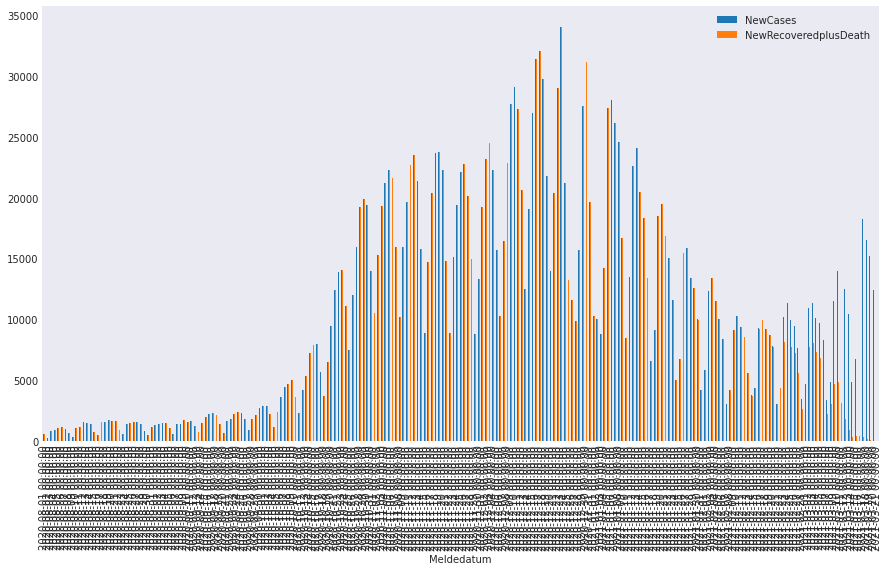

In [718]:
rki['NewRecoveredplusDeath'] = rki.NewRecoveredRKI + rki.NewDeathRKI
rki['08-01-2020':][['NewCases', 'NewRecoveredplusDeath']].plot.bar()
rki.drop('NewRecoveredplusDeath', axis=1, inplace=True)

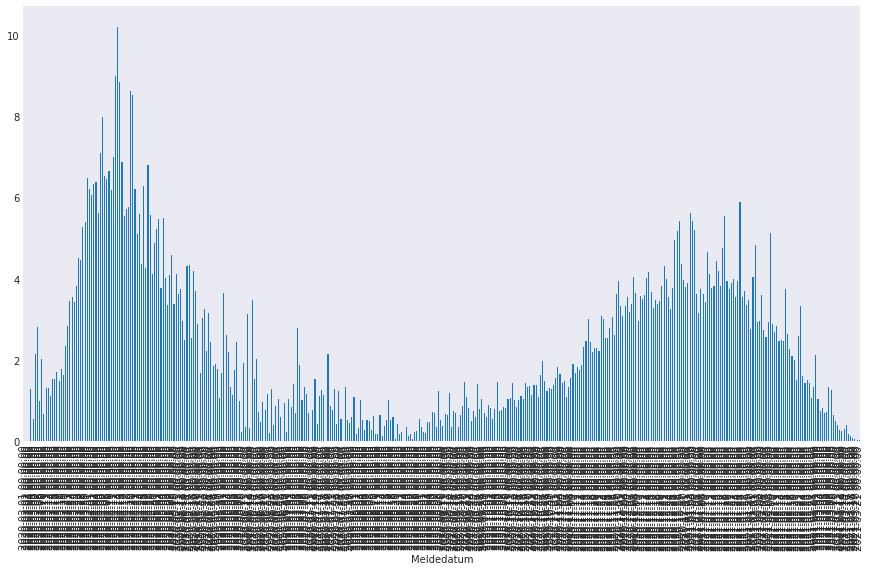

In [719]:
rki['Case Fatality']['03-01-2020':].plot.bar()

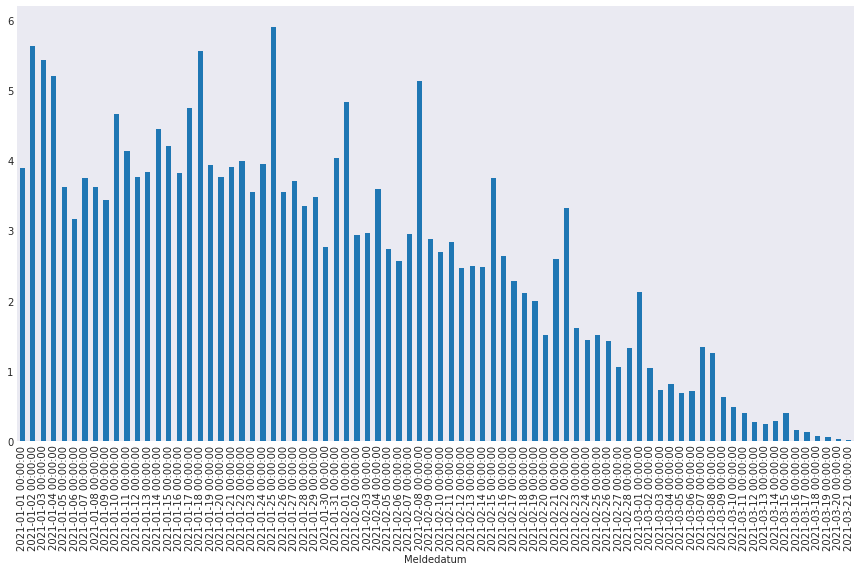

In [720]:
rki['Case Fatality']['01-01-2021':].plot.bar()

Text(0.5, 1.0, 'Case Fatality Germany (%)')

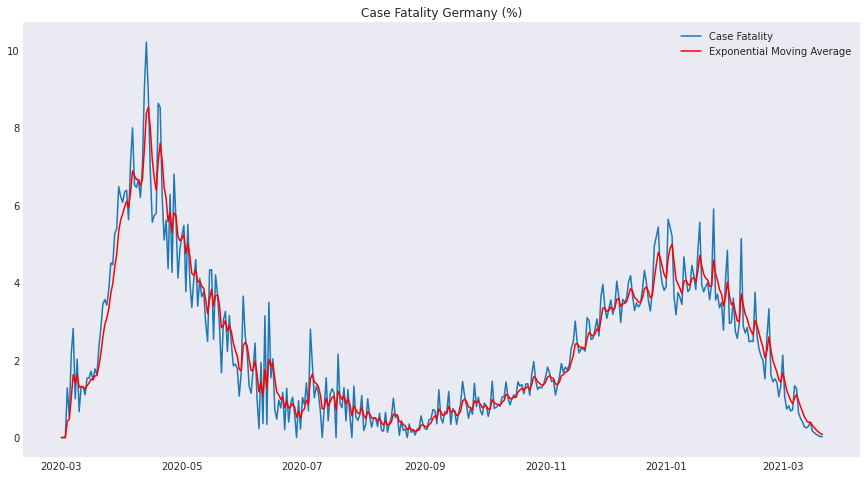

In [721]:
start_date = '03-01-2020'
x = rki[start_date:].index
plt.plot(x, rki['Case Fatality'][start_date:], label='Case Fatality')
plt.plot(x, rki['Case Fatality'].ewm(span=5,adjust=False).mean()[start_date:], label='Exponential Moving Average', color='red')
plt.legend(loc='best')
plt.title('Case Fatality Germany (%)')

Text(0.5, 1.0, 'Daily Covid Fatalities (PCR positive) under 60 years Germany')

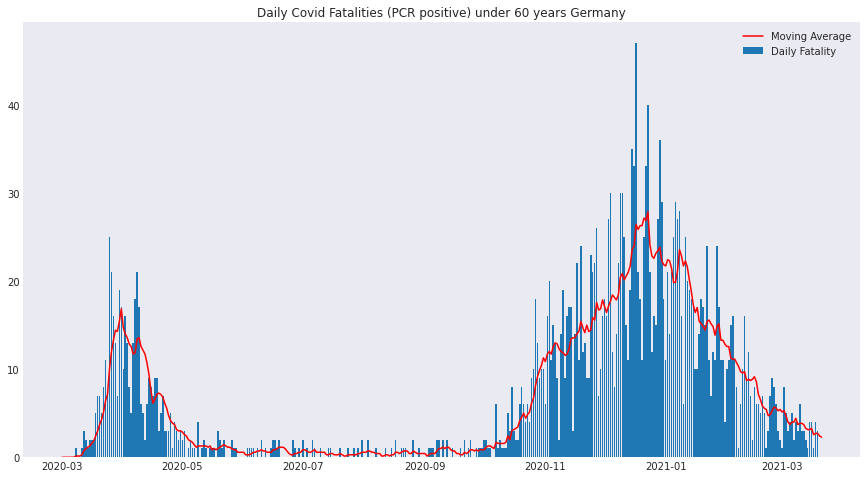

In [722]:
start_date = '03-01-2020'
x = rki_under60[start_date:].index
plt.bar(x, rki_under60.NewDeathRKI[start_date:], label='Daily Fatality')
plt.plot(x, rki_under60.NewDeathRKI.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Daily Covid Fatalities (PCR positive) under 60 years Germany')

Text(0.5, 1.0, 'Case Fatality (PCR positive) under 60 years Germany in %')

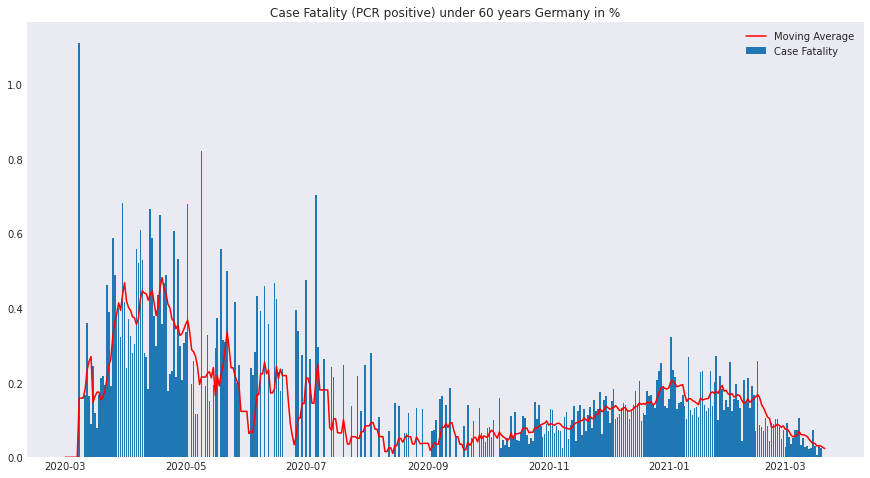

In [723]:
start_date = '03-01-2020'
x = rki_under60[start_date:].index
plt.bar(x, rki_under60['Case Fatality'][start_date:], label='Case Fatality')
plt.plot(x, rki_under60['Case Fatality'].rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Case Fatality (PCR positive) under 60 years Germany in %')